In [ ]:
#Importing libraries
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/churn_prediction_sunbase/Churn_data.csv'
df=pd.read_csv(path)
df.head()

,Unnamed: 0,Age,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill,senior_citizen,middle_aged,young_adults,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Subscription_Length_Bins_1 - 6,Subscription_Length_Bins_7 - 12,Subscription_Length_Bins_13 - 18,Subscription_Length_Bins_19 - 24
0,0,63,73.36,236,0,1247.12,1,0,0,0,1,0,0,1,0,0,0,0,1,0
1,1,62,48.76,172,0,48.76,1,0,0,1,0,0,0,0,0,1,1,0,0,0
2,2,24,85.47,460,0,427.35,0,0,1,1,0,0,0,1,0,0,1,0,0,0
3,3,36,97.94,297,1,293.82,0,0,1,1,0,0,0,0,1,0,1,0,0,0
4,4,46,58.14,266,0,1104.66,0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
x=df.drop('Churn',axis=1)
x


,Age,Monthly_Bill,Total_Usage_GB,Total_Bill,senior_citizen,middle_aged,young_adults,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Subscription_Length_Bins_1 - 6,Subscription_Length_Bins_7 - 12,Subscription_Length_Bins_13 - 18,Subscription_Length_Bins_19 - 24
0,63,73.36,236,1247.12,1,0,0,0,1,0,0,1,0,0,0,0,1,0
1,62,48.76,172,48.76,1,0,0,1,0,0,0,0,0,1,1,0,0,0
2,24,85.47,460,427.35,0,0,1,1,0,0,0,1,0,0,1,0,0,0
3,36,97.94,297,293.82,0,0,1,1,0,0,0,0,1,0,1,0,0,0
4,46,58.14,266,1104.66,0,1,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,55.13,226,1267.99,0,0,1,0,1,0,1,0,0,0,0,0,0,1
99996,62,61.65,351,1171.35,1,0,0,1,0,0,0,0,0,1,0,0,0,1
99997,64,96.11,251,1633.87,1,0,0,0,1,1,0,0,0,0,0,0,1,0
99998,51,49.25,434,985.00,0,1,0,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
y=df['Churn']
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
df212=pd.DataFrame(x_train)
df212

,Age,Monthly_Bill,Total_Usage_GB,Total_Bill,senior_citizen,middle_aged,young_adults,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Subscription_Length_Bins_1 - 6,Subscription_Length_Bins_7 - 12,Subscription_Length_Bins_13 - 18,Subscription_Length_Bins_19 - 24
34096,23,42.41,428,212.05,0,0,1,0,1,1,0,0,0,0,1,0,0,0
88998,32,99.84,308,1397.76,0,0,1,0,1,0,0,1,0,0,0,0,1,0
23299,27,71.91,73,1510.11,0,0,1,1,0,0,0,0,1,0,0,0,0,1
10628,50,60.56,222,666.16,0,1,0,1,0,0,0,0,0,1,0,1,0,0
48846,68,59.99,213,1319.78,1,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92596,32,39.61,492,39.61,0,0,1,0,1,0,0,0,0,1,1,0,0,0
63348,19,82.22,350,1644.40,0,0,1,1,0,0,0,0,0,1,0,0,0,1
6634,64,48.09,276,673.26,1,0,0,0,1,0,0,0,0,1,0,0,1,0
98639,49,85.41,420,1622.79,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
# Create a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_dim=x_train.shape[1]),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)



Epoch 1/5
2188/2188 [==============================] - 6s 2ms/step - loss: 0.7852 - accuracy: 0.5018
Epoch 2/5
2188/2188 [==============================] - 4s 2ms/step - loss: 0.6933 - accuracy: 0.5017
Epoch 3/5
2188/2188 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5010
Epoch 4/5
2188/2188 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5019
Epoch 5/5
2188/2188 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5024


In [ ]:
nn_predictions = model.predict(x_test)


938/938 [==============================] - 1s 1ms/step


In [ ]:
# Concatenate the predictions horizontally with the original features
xgb_input = np.hstack((x_test, nn_predictions))

In [ ]:
import xgboost as xgb

# Define and train an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=1000)
xgb_model.fit(xgb_input, y_test,verbose=1)  # Assuming y_test contains the target labels


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Get predictions from the XGBoost model
xgb_predictions = xgb_model.predict(xgb_input)

# Evaluate the ensemble model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, xgb_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, xgb_predictions))

print('Confusion Matrix:')
print(confusion_matrix(y_test, xgb_predictions))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     15010
           1       0.97      0.97      0.97     14990

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000

Confusion Matrix:
[[14615   395]
 [  455 14535]]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

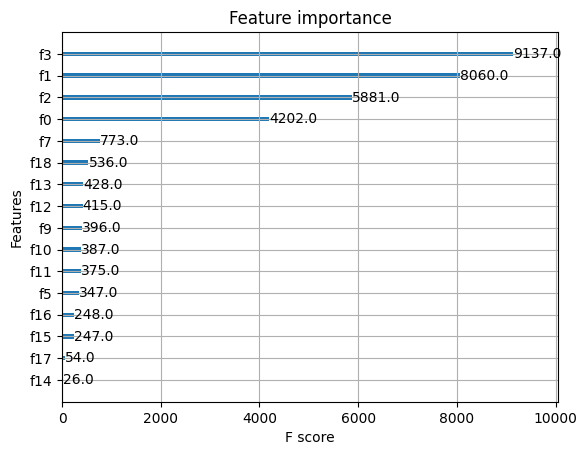

In [ ]:
from xgboost import plot_importance

plot_importance (xgb_model)

In [ ]:
# Assuming you have a trained XGBoost model stored in the variable 'model'
xgb_model.save_model('xgb_model.json')


In [24]:
import xgboost as xgb
import pandas as pd


def predict_churn(age, gender, location, subscription_length, monthly_bill, total_usage_gb):
    # Load the saved XGBoost model
    loaded_model = xgb.Booster()
    loaded_model.load_model('/content/drive/MyDrive/churn_prediction_sunbase/xgb_model.json')

    # Create a new DataFrame with the input parameters
    data = [[age, gender, location, subscription_length, monthly_bill, total_usage_gb]]
    columns = ["Age", "Gender", "Location", "Subscription_Length_Months", "Monthly_Bill", "Total_Usage_GB"]
    new_df = pd.DataFrame(data, columns=columns)


     # Perform one-hot encoding for categorical variables (Gender and Location)
    new_df = pd.get_dummies(new_df, columns=["Gender", "Location"], drop_first=True)

    # Create a DMatrix for prediction
    new_df_dmatrix = xgb.DMatrix(new_df)

    # Make predictions using the loaded XGBoost model

    single = loaded_model.predict(new_df_dmatrix)
    probablity = loaded_model.predict(new_df_dmatrix)

    if single == 1:
        o1 = "This customer is likely to be churned!!"
        o2 = "Confidence: {:.2f}%".format(probablity[0] * 100)
        print(o1,o2)
    else:
        o1 = "This customer is likely to continue!!"
        o2 = "Confidence: {:.2f}%".format(probablity[0] * 100)
        print(o1,o2)





In [10]:
age = int(input("Enter Age: "))
gender = input("Enter Gender (Male/Female): ")
location = input("Enter Location: ")
subscription_length = int(input("Enter Subscription Length (in months): "))
monthly_bill = float(input("Enter Monthly Bill: "))
total_usage_gb = int(input("Enter Total Usage (in GB): "))

Enter Age: 63
Enter Gender (Male/Female): Male
Enter Location: Los Angeles
Enter Subscription Length (in months): 17
Enter Monthly Bill: 73.36
Enter Total Usage (in GB): 236


In [25]:
'''#Example usage:
age = 63
gender = 'Male'
location = 'Los Angeles'
subscription_length = 17
monthly_bill = 73.36
total_usage_gb = 236'''

result = predict_churn(age, gender, location, subscription_length, monthly_bill, total_usage_gb)
print(result)


This customer is likely to continue!! Confidence: 53.16%
None
